In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [19]:
draw_gamma = np.random.gamma(2,1,size=1000)

the mean and variance of a Gamma(a,b) random variable are a/b and a/b^2 respectively.

(array([ 338.,  324.,  175.,   94.,   39.,   21.,    6.,    1.,    1.,    1.]),
 array([  0.05644606,   1.1415786 ,   2.22671113,   3.31184366,
          4.39697619,   5.48210872,   6.56724126,   7.65237379,
          8.73750632,   9.82263885,  10.90777138]),
 <a list of 10 Patch objects>)

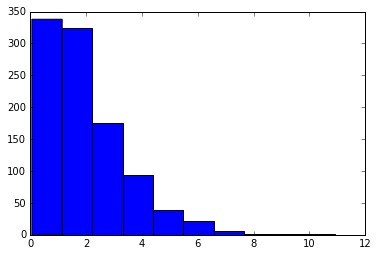

In [20]:
plt.hist(draw_gamma)

In [22]:
x_bar = (1./1000)*np.sum(draw_gamma)
print(x_bar)

1.96914350491


In [26]:
np.var(draw_gamma)

2.0551567278408811

(array([ 674.,  195.,   50.,   14.,   17.,    9.,    5.,    8.,    7.,
           4.,    1.,    3.,    3.,    2.,    1.,    0.,    1.,    1.,
           2.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.]),
 array([  4.67991491e-07,   1.59798183e+00,   3.19596318e+00,
          4.79394454e+00,   6.39192590e+00,   7.98990726e+00,
          9.58788861e+00,   1.11858700e+01,   1.27838513e+01,
          1.43818327e+01,   1.59798140e+01,   1.75777954e+01,
          1.91757768e+01,   2.07737581e+01,   2.23717395e+01,
          2.39697208e+01,   2.55677022e+01,   2.71656835e+01,
          2.87636649e+01,   3.03616463e+01,   3.19596276e+01,
          3.35576090e+01,   3.51555903e+01,   3.67535717e+01,
          3.83515530e+01,   3.99495344e+01,   4.15475158e+01,
          4.31454971e+01,   4.47434785e+01

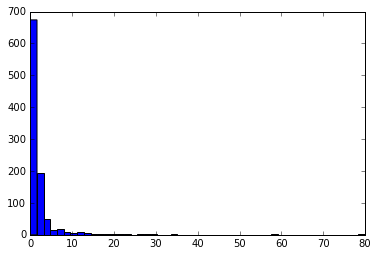

In [32]:
plt.hist(np.power((draw_gamma - draw_gamma.mean()),2),bins=50)

In [66]:
draw_beta = np.random.beta(5,3,size=100000)

The posterior mean for θ is equal to 5/5+3=0.625

(array([    19.,     92.,    340.,    718.,   1336.,   2261.,   3567.,
          4712.,   6231.,   7789.,   9199.,  10142.,  10622.,  10580.,
         10063.,   8692.,   6687.,   4409.,   2106.,    435.]),
 array([ 0.05704552,  0.10385951,  0.1506735 ,  0.1974875 ,  0.24430149,
         0.29111548,  0.33792947,  0.38474346,  0.43155745,  0.47837144,
         0.52518543,  0.57199942,  0.61881341,  0.66562741,  0.7124414 ,
         0.75925539,  0.80606938,  0.85288337,  0.89969736,  0.94651135,
         0.99332534]),
 <a list of 20 Patch objects>)

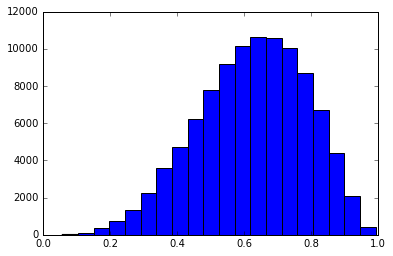

In [67]:
plt.hist(draw_beta, bins=20)

In [70]:
np.mean(draw_beta*1./(1-draw_beta))

2.4885878838870314

In [73]:
n_repeat = 100
list_pr = []
for i in range(n_repeat):
    draw_beta = np.random.beta(5,3,size=100000)
    qty = (draw_beta*1./(1-draw_beta))
    count_occur = (qty>1.0).astype(int).sum()
    print("In iter{i}, {c} were over 1.0".format(i=i, c = count_occur*1.0/draw_beta.shape[0]))
    list_pr.append(count_occur*1.0/draw_beta.shape[0])


In iter0, 0.77295 were over 1.0
In iter1, 0.77354 were over 1.0
In iter2, 0.77214 were over 1.0
In iter3, 0.7729 were over 1.0
In iter4, 0.77232 were over 1.0
In iter5, 0.77399 were over 1.0
In iter6, 0.77358 were over 1.0
In iter7, 0.77407 were over 1.0
In iter8, 0.77411 were over 1.0
In iter9, 0.77413 were over 1.0
In iter10, 0.77256 were over 1.0
In iter11, 0.77391 were over 1.0
In iter12, 0.77559 were over 1.0
In iter13, 0.77263 were over 1.0
In iter14, 0.77285 were over 1.0
In iter15, 0.77301 were over 1.0
In iter16, 0.77442 were over 1.0
In iter17, 0.77246 were over 1.0
In iter18, 0.7745 were over 1.0
In iter19, 0.77238 were over 1.0
In iter20, 0.77316 were over 1.0
In iter21, 0.77363 were over 1.0
In iter22, 0.77347 were over 1.0
In iter23, 0.77271 were over 1.0
In iter24, 0.77159 were over 1.0
In iter25, 0.77428 were over 1.0
In iter26, 0.77275 were over 1.0
In iter27, 0.77357 were over 1.0
In iter28, 0.77155 were over 1.0
In iter29, 0.77452 were over 1.0
In iter30, 0.77357 wer

In [77]:
print(np.mean(list_pr),np.var(list_pr))

0.7732995 1.47062675e-06


Use a (large) Monte Carlo sample to approximate the 0.3 quantile of the standard normal distribution (N(0,1)), the number such that the probability of being less than it is 0.3.

Use the 𝚚𝚞𝚊𝚗𝚝𝚒𝚕𝚎 function in R. You can of course check your answer using the 𝚚𝚗𝚘𝚛𝚖 function.

Report your answer to at least two decimal places.

In [95]:
n_sample_draws = 10000
n_repeats = 1000
list_pr_3 = []
for i in range(n_repeats):
    draw_gauss = np.random.normal(0,1,size=n_sample_draws)
    count_3 = [i<0.3 for i in draw_gauss]
    list_pr_3.append(np.array(count_3).astype(int).sum())
    

In [102]:
np.array([i*1./n_sample_draws for i in list_pr_3]).mean()

0.61768889999999999

In [105]:
import scipy.stats

In [107]:
scipy.stats.norm.ppf(0.3)

-0.52440051270804089

In [104]:
np.percentile(draw_gauss,0.3)

-2.687885791372159